Dataset Preparation

In [3]:
import pandas as pd

# Load your dataset
df = pd.read_excel('D:/Data Sets/E Commerce Dataset.xlsx', sheet_name = 'E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

Handle Imbalance with SMOTE

Class distribution:
 Churn
0    4682
1     948
Name: count, dtype: int64


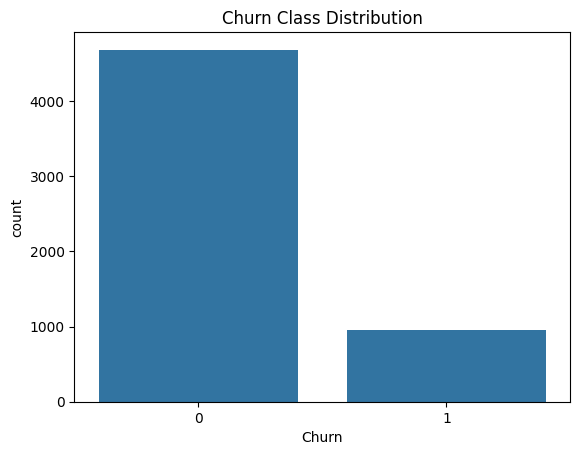

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your cleaned DataFrame
churn_counts = df['Churn'].value_counts()
print("Class distribution:\n", churn_counts)

# Visualize
sns.countplot(x='Churn', data=df)
plt.title("Churn Class Distribution")
plt.show()


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE
import numpy as np

def preprocess_churn_data(df):
    df = df.copy()

    # Drop CustomerID (non-informative)
    if 'CustomerID' in df.columns:
        df.drop('CustomerID', axis=1, inplace=True)

    # Ensure target is integer
    df['Churn'] = df['Churn'].astype(int)

    # Separate target early
    y = df['Churn']
    X = df.drop('Churn', axis=1)

    # Split categorical and numerical columns
    cat_cols = X.select_dtypes(include='object').columns
    num_cols = X.select_dtypes(include=['int64', 'float64']).columns

    # Impute missing values
    cat_imputer = SimpleImputer(strategy='most_frequent')
    num_imputer = SimpleImputer(strategy='median')
    X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])
    X[num_cols] = num_imputer.fit_transform(X[num_cols])

    # Encode categorical
    for col in cat_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

    # Optional: Outlier removal (IsolationForest)
    iso = IsolationForest(contamination=0.02, random_state=42)
    outliers = iso.fit_predict(X)
    X = X[outliers != -1]
    y = y[outliers != -1]

    # Scale numeric columns
    scaler = StandardScaler()
    X[num_cols] = scaler.fit_transform(X[num_cols])

    # Train-Test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # SMOTE for class balance
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_resample(X_train, y_train)

    return X_res, X_test, y_res, y_test, X.columns.tolist()


In [24]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


Run Pipeline

In [25]:
X_res, X_test, y_res, y_test, feature_names = preprocess_churn_data(df)

print("✅ Preprocessing done.")
print("Resampled shape:", X_res.shape)
print("Test shape:", X_test.shape)


✅ Preprocessing done.
Resampled shape: (7336, 18)
Test shape: (1104, 18)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

 XGBoost: for feature-level gradient boosting

 BiLSTM: to learn sequence-like patterns from tabular data

 CNN: to learn local spatial patterns in the tabular feature space

Import Libraries